# Project - Data Cleaning

- Study Group: 03/02/21

- Official Solution: https://github.com/learn-co-curriculum/dsc-data-cleaning-project/tree/solution

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [97]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')
display(heroes_df.head(),powers_df.head())

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [98]:
# Option 1
heroes_df = heroes_df.drop('Unnamed: 0',axis=1)
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [99]:
## option 2 - use index_col arg for read_csv
heroes_df = pd.read_csv('heroes_information.csv',index_col=0)
heroes_df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [100]:
heroes_df.describe().round(2)

,Height,Weight
count,734.00,732.00
mean,102.25,43.86
std,139.62,130.82
min,-99.00,-99.00
25%,-99.00,-99.00
50%,175.00,62.00
75%,185.00,90.00
max,975.00,900.00


In [101]:
powers_df.describe().round(2)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Scorpion,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




### `heroes_df` null values

In [102]:
## Get total Number of null values
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [103]:
## Visualize the rows that contain null values
heroes_df[ heroes_df.isna().any(axis=1) ]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.0
244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.0
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
348,Jack Bauer,Male,-,-,-,-99.0,NaN,-,good,-99.0
354,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.0


In [104]:
## Fill weight nulls with max (king kong, godzilla)
heroes_df['Weight'] = heroes_df['Weight'].fillna( heroes_df['Weight'].max())


In [105]:
## Let's Inspect the other values in the two columns with missing data
heroes_df["Publisher"].value_counts(dropna=False)

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
NaN                   15
George Lucas          14
Image Comics          14
Star Trek              6
HarperCollins          6
Team Epic TV           5
SyFy                   5
Icon Comics            4
IDW Publishing         4
ABC Studios            4
Shueisha               4
Wildstorm              3
Sony Pictures          2
Hanna-Barbera          1
Rebellion              1
Microsoft              1
Titan Books            1
Universal Studios      1
J. R. R. Tolkien       1
South Park             1
J. K. Rowling          1
Name: Publisher, dtype: int64

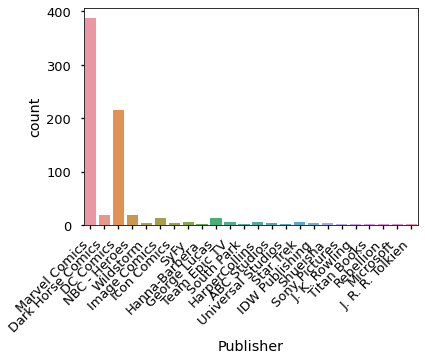

In [106]:
## Plot the counts for Publisher  (with legible x-axis)
ax = sns.countplot(data=heroes_df,x='Publisher')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, fontdict={'ha':'right'});

### `powers_df`

In [107]:
powers_df.isna().sum()

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 168, dtype: int64

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

### Deal with Duplicates

In [108]:
## Check for duplicates
powers_df[powers_df.duplicated(keep=False)]

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient


In [109]:
heroes_df[heroes_df.duplicated(keep=False)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
290,Goliath,Male,-,Human,-,-99.0,Marvel Comics,-,good,-99.0
291,Goliath,Male,-,Human,-,-99.0,Marvel Comics,-,good,-99.0


In [110]:
## Drop duplicates
heroes_df.drop_duplicates(inplace=True)

In [111]:
heroes_df[heroes_df.duplicated(keep=False)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight


### Join DataFrames

In [112]:
display(heroes_df.head(2), powers_df.head(2))

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [113]:
heroes_df.shape, powers_df.shape

((733, 10), (667, 168))

In [114]:
df = pd.merge(heroes_df,powers_df,left_on='name', right_on='hero_names',how='inner')
df

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0,...,False,False,False,False,False,False,False,False,False,False
656,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0,...,False,False,False,False,False,False,False,False,False,False
657,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,...,False,False,False,False,False,False,False,False,False,False
658,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0,...,False,False,False,False,False,False,False,False,False,False


In [115]:
## Check null values after join
df.isna().sum()

name                     0
Gender                   0
Eye color                0
Race                     0
Hair color               0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 178, dtype: int64

In [116]:
## Check all rows with any null values
df[df.isna().any(axis=1)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
43,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,False
80,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,False
125,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0,...,False,False,False,False,False,False,False,False,False,False
159,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,False
219,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,False
237,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,False
257,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,900.0,...,False,False,False,False,False,False,False,False,False,False
316,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,False
339,Katniss Everdeen,Female,-,Human,-,-99.0,NaN,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,False
346,King Kong,Male,yellow,Animal,Black,30.5,NaN,-,good,900.0,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

<AxesSubplot:xlabel='Height', ylabel='Weight'>

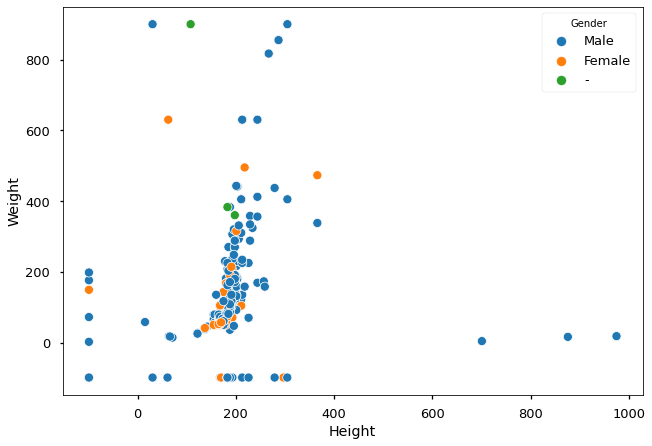

In [117]:
# df.groupby('Gender').plot(kind='scatter',x='Height',y='Weight')
plt.style.use('seaborn-talk')
sns.scatterplot(data=df, x='Height',y='Weight',hue='Gender')

## Whats weird?

- Height/Weight < 0????

### Addressing placeholder values (-99)

In [118]:
## visualize which heroes have negative values
df[(df['Height'] < 0) | (df['Weight'] <0)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,False
13,Alex Mercer,Male,-,Human,-,-99.0,Wildstorm,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False
14,Alex Woolsly,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,False
16,Allan Quatermain,Male,-,-,-,-99.0,Wildstorm,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,Watcher,Male,-,-,-,-99.0,Marvel Comics,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,False
643,Weapon XI,Male,-,-,-,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False
644,White Canary,Female,brown,Human,Black,-99.0,DC Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False
645,Wildfire,Male,-,-,-,-99.0,DC Comics,-,good,-99.0,...,False,False,False,False,False,False,False,False,False,False


In [119]:
height =  df['Height'].copy()
height.map(lambda x: np.nan if x < 0 else x)

0      203.0
1      191.0
2      185.0
3      203.0
4        NaN
       ...  
655    165.0
656    304.8
657     66.0
658    170.0
659    185.0
Name: Height, Length: 660, dtype: float64

In [120]:
## Use .map and a lambda to replace - values with nan
df['Height'] = df['Height'].map(lambda x: np.nan if x < 0 else x)
df['Weight'] = df['Weight'].apply(lambda x: np.nan if x < 0 else x)
df.isna().sum()

name                     0
Gender                   0
Eye color                0
Race                     0
Hair color               0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 178, dtype: int64

In [121]:
df[(df['Height'] < 0) | (df['Weight'] <0)]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient


In [122]:
## Lets visualize the null values we created
df[df.isna()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
# ## DO it in a looop instead
# for col in ['Height','Weight']:
#     df[col]  = df[col].map(lambda x: np.nan if x < 0 else x)
    
# df[df.isna()]

### fill heights and weights by gender

In [124]:
gender_vals = df.groupby('Gender').mean()[['Height','Weight']]
gender_vals

,Height,Weight
Gender,,
-,177.666667,243.888889
Female,174.748175,79.859259
Male,192.462209,128.874233


In [125]:
gender_vals.loc['Male','Height']

192.4622093023256

In [126]:
## fill Weight by Gender
## > NOTE TO SELF - MAY WANT TO DO ON INVIDIUAL M/F DF's
# df.loc[(df['Gender'] == "Male")&(df['Weight'].isna()),
#        "Weight"] = gender_vals.loc['Male','Weight']

# df.loc[(df['Gender'] == "Female")&(df['Weight'].isna()),
#        "Weight"] = gender_vals.loc['Female','Weight']

In [127]:
df.isna().sum()[["Height",'Weight']]

Height    170
Weight    190
dtype: int64

In [128]:
def fill_by_group_value(df,null_col,group_col='Gender',agg_func='mean'):
    """Uses the aggregate data from the groupn col to fill in the null col"""
    group_vals = df.groupby(group_col).agg(agg_func)[[null_col]]
    groups = df[group_col].unique()
    
    for group in groups:
        df.loc[(df[group_col] == group)&(df[null_col].isna()),
           null_col] = group_vals.loc[group,null_col]
        

In [129]:
fill_by_group_value(df,'Height')
df.isna().sum()[["Height",'Weight']]

Height      0
Weight    190
dtype: int64

In [130]:
fill_by_group_value(df,'Weight')
df.isna().sum()[["Height",'Weight']]

Height    0
Weight    0
dtype: int64

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

> Note: seaborn now has a [`displot`](https://seaborn.pydata.org/generated/seaborn.displot.html)

In [131]:
male_heroes_df = df[ df['Gender'] =='Male']
female_heroes_df =  df[ df['Gender'] =='Female']

def show_distplot(dataframe, gender, column_name):
    sns.distplot()

In [31]:
# Male Height


In [32]:
# Male Weight


In [33]:
# Female Height


In [34]:
# Female Weight


Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [35]:
power_counts = df[powers_df.drop('hero_names',axis=1).columns].sum()
power_counts

Agility                  244
Accelerated Healing      181
Lantern Power Ring        11
Dimensional Awareness     25
Cold Resistance           49
                        ... 
Phoenix Force              1
Molecular Dissipation      1
Vision - Cryo              1
Omnipresent                2
Omniscient                 2
Length: 167, dtype: int64

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data